In [1]:
import random
from string import ascii_uppercase
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def draw_graph(matrix, labels = None):
    """
    Изображение графа дорог для визуализации работы алгоритма
    """
    graph = nx.Graph()
    if not labels:
        labels = [ascii_uppercase[x] for x in range(len(matrix))]
    graph.add_nodes_from(labels)
    edges = []
    for row in range(len(matrix) - 1):
        for col in range(row + 1, len(matrix[row])):
            if matrix[row][col] != float("inf"):
                edges.append((labels[row], labels[col], matrix[row][col]))
    graph.add_weighted_edges_from(edges)
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos=pos, with_labels=True)
    el = dict(((i[0], i[1]), i[2]) for i in edges)
    nx.draw_networkx_edge_labels(graph, pos=pos, edge_labels=el, font_color='red')
    plt.show()

In [3]:
def prima(W, city_labels = None):  # sourcery no-metrics
    """
    Алгоритм Прима для нахождения сети дорог минимальной длины
    """

    _ = float('inf')
    cities_count = len(W)

    # проверка на размерость таблицы связей
    for weights in W:
        assert len(weights) == cities_count

    # генерация имен городов
    if not city_labels:
        city_labels = [ascii_uppercase[x] for x in range(cities_count)]

    assert cities_count <= len(city_labels)

    # выбор начального города
    free_vertexes = list(range(len(city_labels)))

    starting_vertex = random.choice(free_vertexes)
    tied = [starting_vertex]
    free_vertexes.remove(starting_vertex)

    road_length = 0

    edges = []

    # пока есть свободные вершины
    while free_vertexes:
        min_link = None  # соединение, образующее минимальный путь
        overall_min_path = _    # минимальный путь среди всех возможных

        # проход по всем уже связанным дорогой вершинам
        for current_vertex in tied:
            weights = W[current_vertex]   # связи текущей вершины с другими

            min_path = _
            free_vertex_min = current_vertex

            # проход по связанным городам
            for vertex in range(cities_count):
                vertex_path = weights[vertex]
                if vertex_path == 0:
                    continue

                if vertex in free_vertexes and vertex_path < min_path:
                    free_vertex_min = vertex
                    min_path = vertex_path

            if (
                free_vertex_min != current_vertex
                and overall_min_path > min_path
            ):
                min_link = (current_vertex, free_vertex_min)
                overall_min_path = min_path
        try:
            path_length = W[min_link[0]][min_link[1]]
        except TypeError:
            raise Error("Unable to find path")

        edges.append((city_labels[min_link[0]], city_labels[min_link[1]], path_length))

        road_length += path_length
        free_vertexes.remove(min_link[1])
        tied.append(min_link[1])

    return edges

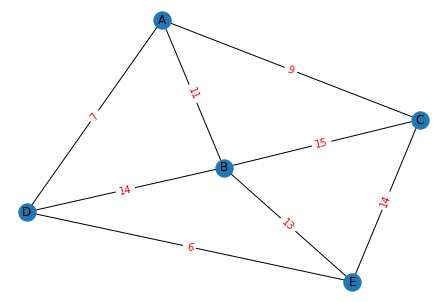

In [4]:
_ = float('inf')

W = [
    #A  B  C  D  E
    [0, 11, 9, 7, _], # A
    [11, 0, 15, 14, 13], # B
    [9, 15, 0, _, 14], # C
    [7, 14, _, 0, 6], # D
    [_, 13, 14, 6, 0], # E
]
draw_graph(W)



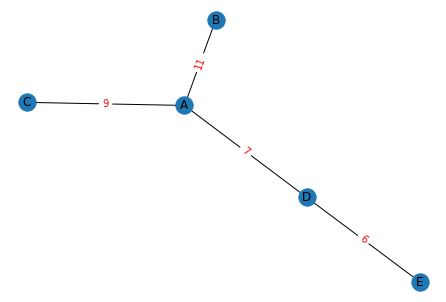

In [5]:
graph2 = nx.Graph()
f = prima(W)
graph2.add_weighted_edges_from(f)
pos2 = nx.spring_layout(graph2)
nx.draw(graph2, pos=pos2, with_labels=True)
el2 = dict(((i[0], i[1]), i[2]) for i in f)
nx.draw_networkx_edge_labels(graph2, pos=pos2, edge_labels=el2, font_color='red')
plt.show()